<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2023<br>
            Dr. Eric Van Dusen
        </p></td></tr>
</table>

# Using Sympy to take Derivatives

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Let's start with the Cobb - Douglas Production Function

$Q = A  \cdot L^{\alpha} \cdot K^\beta$

$\frac{dQ}{dL} = A \cdot \alpha \cdot L^{\alpha - 1} \cdot K^\beta$


$\frac{d^2Q}{dL^2} = A \cdot \alpha (\alpha - 1) \cdot L^{\alpha - 2} \cdot K^\beta$


Define the symbols and variables
 - which symbols will we need for the Cobb Douglas formulation?
 - Declare them as symbols

In [2]:
Q, A, L, K, alpha, beta = sp.symbols('Q A L K alpha beta')

Define the Cobb-Douglas production function
 - writing this equation in its Python formulation
 - using the symbols we have already defined

In [3]:
cobb_douglas = A * L**alpha * K**beta

Calculate the **first derivative** with respect to **L**

- This is a *partial derivative*

- sympy.diff ( original equation, thing you are taking the derivative over ) 

- Save that as an equation for future use!

In [4]:
first_derivative = sp.diff(cobb_douglas, L)

Print this result
 - you can just ask sympy to print - spprint ()
 - you can add some text "First Derivative is.."


In [5]:
print("First Derivative:")
sp.pprint(first_derivative)

First Derivative:
   β  α  
A⋅K ⋅L ⋅α
─────────
    L    


This doesnt Look so great 
- lets pass in our function and get sympy to simplify it
- what form you want an equaiton to be in can take many forms

In [6]:
simplified_first_derivative = sp.simplify(first_derivative)
print(simplified_first_derivative)


A*K**beta*L**(alpha - 1)*alpha


Print Result - Variation
- you can also save as Latex !
- It won't render yet - but you can copy paste this into Markdown cell 

In [7]:
first_derivative_latex = sp.latex(first_derivative)
print("First Derivative (LaTeX):")
print(first_derivative_latex)

First Derivative (LaTeX):
\frac{A K^{\beta} L^{\alpha} \alpha}{L}


$\frac{A K^{\beta} L^{\alpha} \alpha}{L}$

Calculate the **second derivative** with respect to **L**
 - use the first derivative that you saved
 - take the derivatie again with respect to variable of interes, L
 - save that equation 

In [8]:
second_derivative = sp.diff(first_derivative, L)

In [9]:
sp.pprint(second_derivative)

   β  α  2      β  α  
A⋅K ⋅L ⋅α    A⋅K ⋅L ⋅α
────────── - ─────────
     2            2   
    L            L    


In [10]:
second_derivative_latex = sp.latex(second_derivative)
print(second_derivative_latex)


\frac{A K^{\beta} L^{\alpha} \alpha^{2}}{L^{2}} - \frac{A K^{\beta} L^{\alpha} \alpha}{L^{2}}


Pasting this into a Markdown cell and adding "dollar signs"

$\frac{A K^{\beta} L^{\alpha} \alpha^{2}}{L^{2}} - \frac{A K^{\beta} L^{\alpha} \alpha}{L^{2}}$


First Derivative (LaTeX):
$\frac{A K^{\beta} L^{\alpha} \alpha}{L}$

Second Derivative (LaTeX):
$\frac{A K^{\beta} L^{\alpha} \alpha^{2}}{L^{2}} - \frac{A K^{\beta} L^{\alpha} \alpha}{L^{2}}$


Lets simplify both of these and generat the Latex

In [11]:
first_div_simp_latex = sp.latex(sp.simplify(first_derivative))
print(first_div_simp_latex)

A K^{\beta} L^{\alpha - 1} \alpha


In [12]:
second_div_simp_latex = sp.latex(sp.simplify(sp.diff(first_derivative, L)))
print(second_div_simp_latex)

A K^{\beta} L^{\alpha - 2} \alpha \left(\alpha - 1\right)


$$A K^{\beta} L^{\alpha - 1} \alpha$$
$$A K^{\beta} L^{\alpha - 2} \alpha \left(\alpha - 1\right)$$



## Now Let's consider the simpler case of a Utility function 
- that has a Cobb-Douglas type formulation 
- consists of consuming two goods $X1$ and $X2$

$  U = \cdot X1^{\alpha} \cdot X2^{1-\alpha}$


In [13]:
U, X1, X2, alpha = sp.symbols('U, X1, X2, alpha ')


In [14]:
U =  X1**alpha * X2**(1-alpha)

In [15]:
first_deriv_x1 = sp.diff(U,X1)

In [16]:
second_deriv_x1 = sp.diff(first_deriv_x1, X1)

In [17]:
sp.pprint(first_deriv_x1)

  α   1 - α  
X₁ ⋅X₂     ⋅α
─────────────
      X₁     


In [18]:
sp.pprint(second_deriv_x1)

  α   1 - α  2     α   1 - α  
X₁ ⋅X₂     ⋅α    X₁ ⋅X₂     ⋅α
────────────── - ─────────────
       2                2     
     X₁               X₁      


In [19]:
sp.simplify(first_deriv_x1) 

X1**(alpha - 1)*X2**(1 - alpha)*alpha

In [20]:
sp.simplify( second_deriv_x1)

X1**(alpha - 2)*X2**(1 - alpha)*alpha*(alpha - 1)

In [29]:
first_deriv_x1_latex = sp.latex(sp.simplify(first_deriv_x1))
print(first_deriv_x1_latex)
second_deriv_x1_latex = sp.latex(sp.simplify(second_deriv_x1))
print(second_deriv_x1_latex)


X_{1}^{\alpha - 1} X_{2}^{1 - \alpha} \alpha
X_{1}^{\alpha - 2} X_{2}^{1 - \alpha} \alpha \left(\alpha - 1\right)


First Derivative (LaTeX):
$X_{1}^{\alpha - 1} X_{2}^{1 - \alpha} \alpha$

Second Derivative (LaTeX):
$X_{1}^{\alpha - 2} X_{2}^{1 - \alpha} \alpha \left(\alpha - 1\right)
$

Lets get Numeric!
- Lets declare some variables as constants ( alpha, x2) 
- and pass in a range for X1

In [22]:
alpha = 0.5  # You can change the value of alpha as needed
X1_values = np.linspace(0.1, 2.0, 100)  # Range of X1 values
X2 = 1.0  # Fixed value for X2

In [23]:
X1_values

array([0.1       , 0.11919192, 0.13838384, 0.15757576, 0.17676768,
       0.1959596 , 0.21515152, 0.23434343, 0.25353535, 0.27272727,
       0.29191919, 0.31111111, 0.33030303, 0.34949495, 0.36868687,
       0.38787879, 0.40707071, 0.42626263, 0.44545455, 0.46464646,
       0.48383838, 0.5030303 , 0.52222222, 0.54141414, 0.56060606,
       0.57979798, 0.5989899 , 0.61818182, 0.63737374, 0.65656566,
       0.67575758, 0.69494949, 0.71414141, 0.73333333, 0.75252525,
       0.77171717, 0.79090909, 0.81010101, 0.82929293, 0.84848485,
       0.86767677, 0.88686869, 0.90606061, 0.92525253, 0.94444444,
       0.96363636, 0.98282828, 1.0020202 , 1.02121212, 1.04040404,
       1.05959596, 1.07878788, 1.0979798 , 1.11717172, 1.13636364,
       1.15555556, 1.17474747, 1.19393939, 1.21313131, 1.23232323,
       1.25151515, 1.27070707, 1.28989899, 1.30909091, 1.32828283,
       1.34747475, 1.36666667, 1.38585859, 1.40505051, 1.42424242,
       1.44343434, 1.46262626, 1.48181818, 1.5010101 , 1.52020

In [24]:
U_values = X1_values**alpha * X2**(1 - alpha)
U_values

array([0.31622777, 0.34524183, 0.37199978, 0.39695813, 0.42043748,
       0.44267324, 0.46384428, 0.48409032, 0.50352294, 0.52223297,
       0.54029547, 0.55777335, 0.57471996, 0.59118098, 0.60719591,
       0.62279916, 0.63802093, 0.65288791, 0.66742381, 0.68164981,
       0.69558492, 0.70924629, 0.72264945, 0.7358085 , 0.74873631,
       0.76144467, 0.77394438, 0.78624539, 0.7983569 , 0.81028739,
       0.82204475, 0.83363631, 0.84506888, 0.85634884, 0.86748213,
       0.87847434, 0.8893307 , 0.90005611, 0.91065522, 0.92113237,
       0.93149169, 0.94173706, 0.95187216, 0.96190048, 0.97182532,
       0.98164982, 0.99137696, 1.00100959, 1.01055041, 1.02000198,
       1.02936678, 1.03864714, 1.04784531, 1.05696344, 1.06600358,
       1.0749677 , 1.08385768, 1.09267534, 1.1014224 , 1.11010055,
       1.11871138, 1.12725644, 1.1357372 , 1.14415511, 1.15251153,
       1.1608078 , 1.16904519, 1.17722495, 1.18534826, 1.19341628,
       1.20143012, 1.20939086, 1.21729954, 1.22515717, 1.23296

In [25]:
first_derivative_values = alpha * X1_values**(alpha - 1) * X2**(1 - alpha)
first_derivative_values

array([1.58113883, 1.44826021, 1.34408681, 1.25957868, 1.18923745,
       1.1295013 , 1.07794797, 1.03286511, 0.99300341, 0.95742711,
       0.92541957, 0.89642146, 0.86998893, 0.84576469, 0.82345746,
       0.80282704, 0.78367335, 0.76582824, 0.74914918, 0.73351447,
       0.71881949, 0.70497372, 0.69189841, 0.67952464, 0.66779184,
       0.65664653, 0.64604126, 0.63593377, 0.62628631, 0.61706501,
       0.60823939, 0.59978194, 0.59166775, 0.58387421, 0.57638075,
       0.56916859, 0.56222056, 0.55552092, 0.54905522, 0.54281015,
       0.53677344, 0.53093376, 0.52528062, 0.5198043 , 0.51449576,
       0.5093466 , 0.50434902, 0.49949571, 0.49477987, 0.49019513,
       0.48573551, 0.48139544, 0.47716967, 0.47305326, 0.46904158,
       0.46513025, 0.46131518, 0.45759246, 0.45395844, 0.45040965,
       0.4469428 , 0.4435548 , 0.44024269, 0.43700369, 0.43383514,
       0.43073453, 0.42769946, 0.42472766, 0.42181696, 0.41896529,
       0.41617069, 0.41343127, 0.41074525, 0.4081109 , 0.40552

In [26]:
second_derivative_values = alpha * (alpha - 1) * X1_values**(alpha - 2) * X2**(1 - alpha)
second_derivative_values

array([-7.90569415, -6.07532883, -4.85637204, -3.99674006, -3.36384308,
       -2.88197498, -2.50509036, -2.20374238, -1.9583135 , -1.75528303,
       -1.5850612 , -1.44067734, -1.31695572, -1.20998128, -1.11674368,
       -1.03489423, -0.96257645, -0.89830564, -0.84088173, -0.78932535,
       -0.74283016, -0.70072689, -0.66245592, -0.62754607, -0.59559813,
       -0.56627184, -0.53927559, -0.5143582 , -0.49130226, -0.46991874,
       -0.4500426 , -0.43152916, -0.41425111, -0.39809605, -0.38296439,
       -0.3687676 , -0.35542679, -0.34287139, -0.33103816, -0.31987027,
       -0.30931648, -0.29933054, -0.28987058, -0.28089861, -0.27238011,
       -0.26428361, -0.25658044, -0.24924433, -0.24225127, -0.23557921,
       -0.22920789, -0.22311867, -0.21729438, -0.21171913, -0.20637829,
       -0.20125828, -0.19634653, -0.19163136, -0.18710194, -0.18274818,
       -0.17856068, -0.1745307 , -0.17065006, -0.16691113, -0.16330676,
       -0.15983028, -0.15647541, -0.15323629, -0.1501074 , -0.14

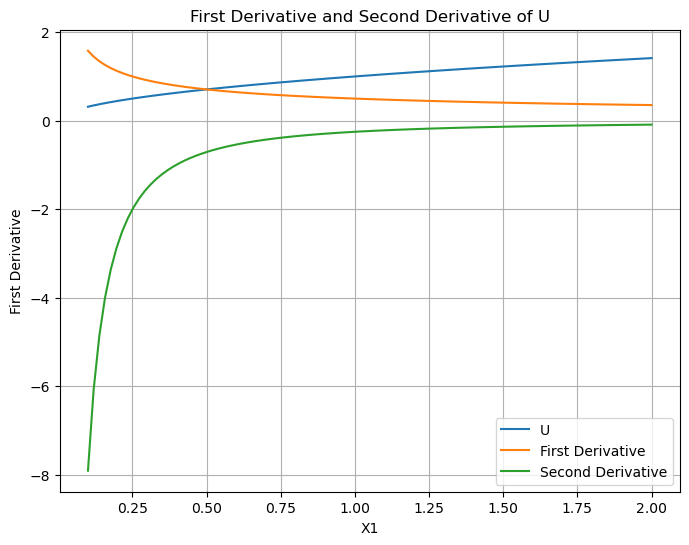

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(X1_values, U_values, label='U')
plt.plot(X1_values, first_derivative_values, label='First Derivative')
plt.plot(X1_values, second_derivative_values, label='Second Derivative')
plt.xlabel('X1')
plt.ylabel('First Derivative')
plt.title('First Derivative and Second Derivative of U')
plt.legend()
plt.grid(True)
plt.show()


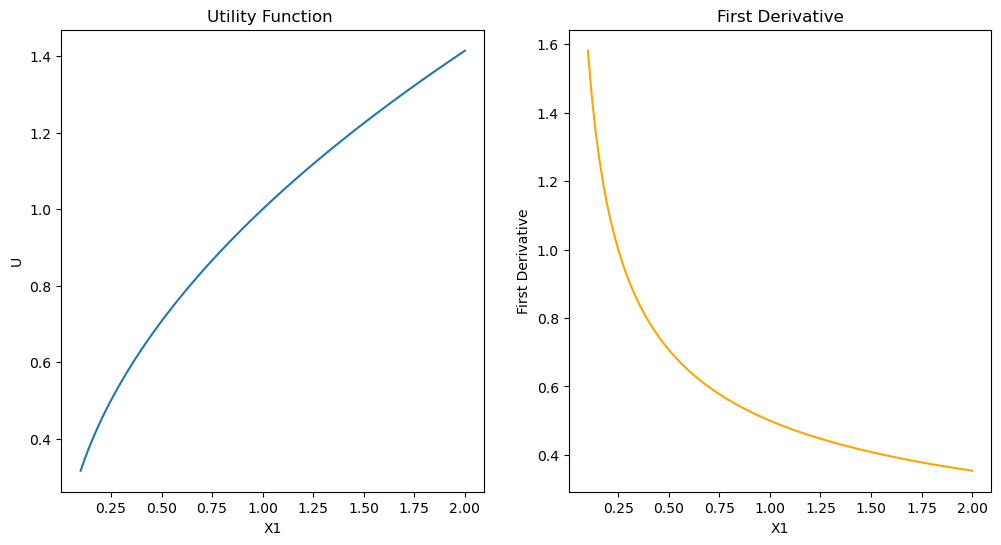

In [28]:


# Create a figure with two subplots (one for U and one for the first derivative)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original function U on the left subplot
ax1.plot(X1_values, U_values, label='U')
ax1.set_xlabel('X1')
ax1.set_ylabel('U')
ax1.set_title('Utility Function ')

# Plot the first derivative on the right subplot
ax2.plot(X1_values, first_derivative_values, label='First Derivative', color='orange')
ax2.set_xlabel('X1')
ax2.set_ylabel('First Derivative')
ax2.set_title('First Derivative')

# Show the plot
plt.show()
